In [2]:
# !pip install -r requirements.txt

In [19]:
!pip install gym

     ---------------------------------------- 0.0/721.7 kB ? eta -:--:--
     ------------------------------------- 721.7/721.7 kB 14.8 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for gym: filename=gym-0.26.2-py3-none-any.whl size=827703 sha256=320dd2bdbe65d69db0c2e06ad9a9bf52a7d6fb9d75fa4e22b3e974fe48f219b1
  Stored in directory: c:\users\lhaus\appdata\local\pip\cache\wheels\95\51\6c\9bb05ebbe7c5cb8171dfaa3611f32622ca4658d53f31c79077
Successfully built gym


In [1]:
import bernoulli_bandit as bb

### save datasets

In [5]:
p_values = [0.1,0.2,0.3,0.4,0.5]
datasets={}
for p in p_values:
    env = bb.BernoulliBanditEnv(bernoulli_prob=p)  # Create environment with the current p
    env = bb.BernoulliBanditWrapper(env)  # Wrap the environment if needed
    datasets[p] = bb.get_bandit_dataset(env, p=p, N_steps=100000)  # Generate the dataset and store it


bernoulli-bandit: Number of samples collected: 100000
Trajectory returns: mean = 0.81698, std = 0.38668291868144367, max = 1.0, min = 0.0
bernoulli-bandit: Number of samples collected: 100000
Trajectory returns: mean = 0.68028, std = 0.4663680109098393, max = 1.0, min = 0.0
bernoulli-bandit: Number of samples collected: 100000
Trajectory returns: mean = 0.57966, std = 0.49361349697916485, max = 1.0, min = 0.0
bernoulli-bandit: Number of samples collected: 100000
Trajectory returns: mean = 0.52015, std = 0.49959381251172436, max = 1.0, min = 0.0
bernoulli-bandit: Number of samples collected: 100000
Trajectory returns: mean = 0.49954, std = 0.4999997883999552, max = 1.0, min = 0.0


## load datasets

In [8]:
import pandas as pd
import pickle
import numpy as np
from matplotlib import pyplot as plt

In [9]:
data_1 =pickle.load(open("bernoulli-bandit-p0.1.pkl", "rb"))


In [10]:

for p in p_values:
    file_name = f"bernoulli-bandit-p{p}.pkl"  
    datasets[p] = pickle.load(open(file_name, "rb"))  


In [13]:
for p, data in datasets.items():
    print(f"p={p}, type={type(data)}")  # Check the type of data

p=0.1, type=<class 'list'>
p=0.2, type=<class 'list'>
p=0.3, type=<class 'list'>
p=0.4, type=<class 'list'>
p=0.5, type=<class 'list'>


In [15]:
average_rewards =[]
for p, data in datasets.items():
  rewards = np.array([np.sum(entry["rewards"]) for entry in data])  
  average_reward = np.mean(rewards)  
  print(f"For p: {p}, average reward: {average_reward}")
  average_rewards.append(average_reward)

For p: 0.1, average reward: 0.81698
For p: 0.2, average reward: 0.68028
For p: 0.3, average reward: 0.57966
For p: 0.4, average reward: 0.52015
For p: 0.5, average reward: 0.49954


In [16]:
print(average_rewards)

[0.81698, 0.68028, 0.57966, 0.52015, 0.49954]


In [17]:


p_values=[]
expected_reward1=[]
expected_reward2=[]
best_reward=[]
start=0.1;
while start<0.6:
    p_values.append(start)
    num1=1-start
    num2=start
    expected_reward1.append(1-start)
    expected_reward2.append(start)
    if num1>num2:
        best_reward.append(num1)
    else:
        best_reward.append(num2)
    start = round(start + 0.1, 1)
    
print(p_values)
print(expected_reward1)
print(expected_reward2)
print(best_reward)

    
    

[0.1, 0.2, 0.3, 0.4, 0.5]
[0.9, 0.8, 0.7, 0.6, 0.5]
[0.1, 0.2, 0.3, 0.4, 0.5]
[0.9, 0.8, 0.7, 0.6, 0.5]


In [18]:
finaldata ={
 "p_values":p_values,
 "Expected Rewards a\u2081":expected_reward1,
 "Expected Rewards a\u2082" :expected_reward2,
  "Average Reward in Dataset" :average_rewards
}
df=pd.DataFrame(finaldata)
pd.set_option("display.width",None)
pd.set_option('display.max_columns', None)  


In [19]:
df

,p_values,Expected Rewards a₁,Expected Rewards a₂,Average Reward in Dataset
0,0.1,0.9,0.1,0.81698
1,0.2,0.8,0.2,0.68028
2,0.3,0.7,0.3,0.57966
3,0.4,0.6,0.4,0.52015
4,0.5,0.5,0.5,0.49954


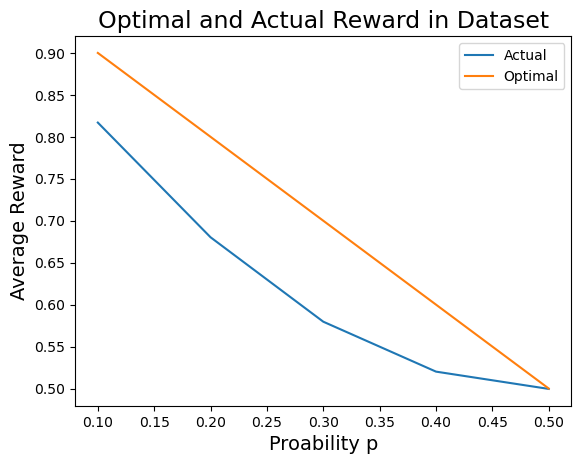

In [21]:
plt.plot(p_values,average_rewards,label="Actual")
plt.plot(p_values,best_reward,label="Optimal")
plt.title("Optimal and Actual Reward in Dataset",fontsize=17)
plt.xlabel("Proability p",fontsize=14)
plt.ylabel("Average Reward",fontsize=14)
plt.legend()
plt.show()